In [2]:
# Linear regression with one variable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/data1.csv')
x_vec = df.values[:, 0].astype(np.float64)   #vector (m,)
y_vec = df.values[:, -1].astype(np.float64)  #vector (m,)

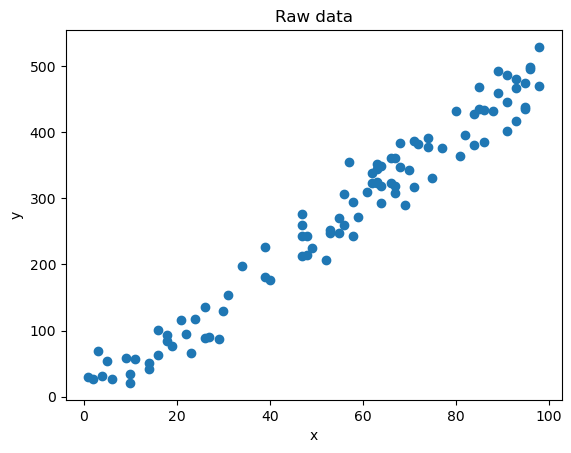

In [ ]:
# plot raw data
plt.figure()
plt.scatter(x_vec, y_vec)
plt.title("Raw data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
y = y_vec.reshape(-1, 1)                    # m×1
m = len(y)
X = np.column_stack((np.ones(m), x_vec))    # m×2

ite = 50000 # iteration
lr = 5e-4 # learning rate
np.random.seed(1)
theta = np.random.rand(2, 1)                # theta: 2x1
J = np.zeros(ite)

for i in range(ite):
    h = X.dot(theta)                        # m×1
    grad = (1.0/m) * (np.dot(X.T, (h - y))) # 2×1
    theta = theta - lr * grad
    #J[i] = (1.0/(2*m)) * float(((h - y).T).dot(h - y))
    J[i] = ((1.0/(2*m)) * np.dot((h - y).T, (h - y))).item()

theta_closed = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)   # 2×1
# show theta
print("Theta (gradient descent):", theta.ravel())
print("Theta (normal equation):", theta_closed.ravel())

Theta (gradient descent): [-2.33383195  5.00392347]
Theta (normal equation): [-2.34958443  5.00414932]


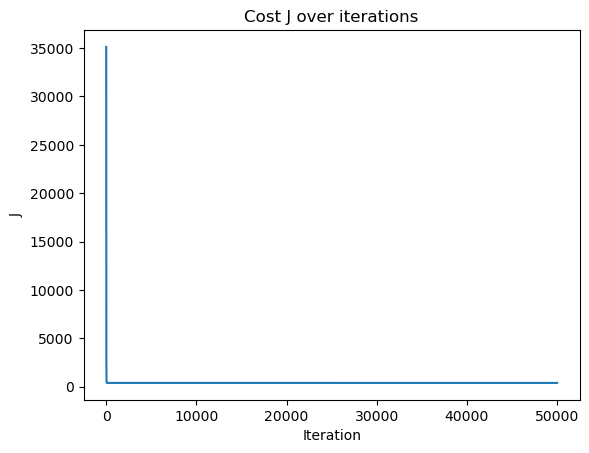

In [24]:
plt.figure()
plt.plot(np.arange(ite), J)
plt.title("Cost J over iterations")
plt.xlabel("Iteration")
plt.ylabel("J")
plt.show()

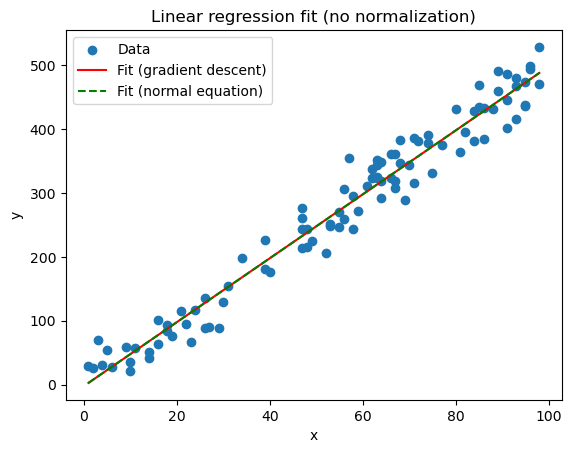

In [ ]:
x_line = np.linspace(np.min(x_vec), np.max(x_vec), 200)
X_line = np.column_stack((np.ones(len(x_line)), x_line))
y_line = X_line.dot(theta) 

plt.figure()
plt.scatter(x_vec, y, label="Data")
plt.plot(x_line, y_line, 'r', label="Fit (gradient descent)")

y_line_closed = X_line.dot(theta_closed)
plt.plot(x_line, y_line_closed, 'g--', label="Fit (normal equation)")
plt.legend()
plt.title("Linear regression fit (no normalization)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()